# HOMEWORK: k-Nearest Neighbors

In [27]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 100)

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/lessons/lesson-8")
df = pd.read_csv('dataset-boston.csv')

The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

## Question 1.  
+ Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  
+ Please create a new variable `MEDV_Category` that stores the level number
+ Remember the quantile function
+ Remember how to segment your pandas data frame

In [5]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


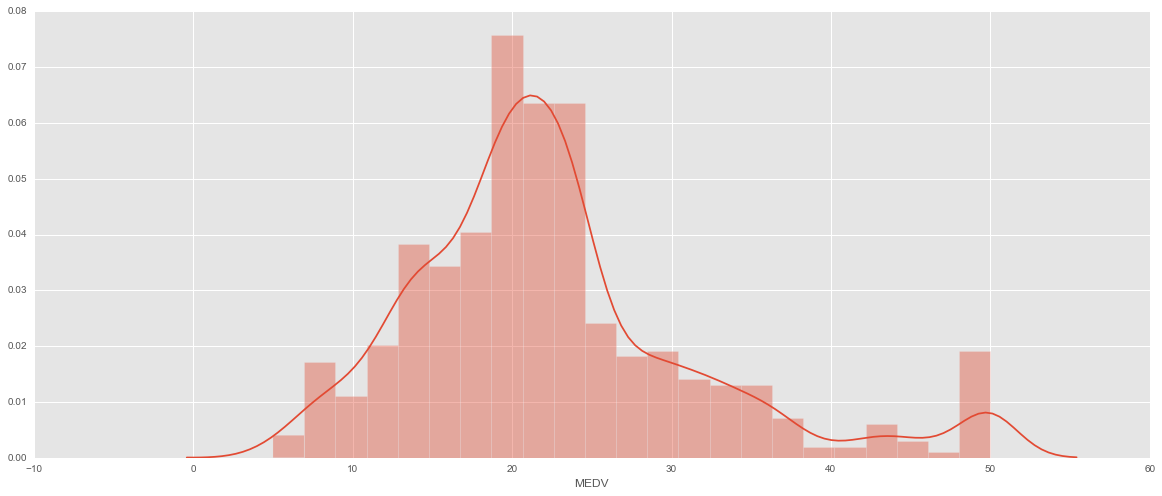

In [7]:
plt.figure(figsize = (20,8))
sns.distplot(df["MEDV"])

In [10]:
print("20%:", df["MEDV"].quantile(.2))
print("50%:", df["MEDV"].quantile(.5))
print("80%:", df["MEDV"].quantile(.8))
print("100%:", df["MEDV"].quantile(1))

part1 = df["MEDV"].quantile(.2)
part2 = df["MEDV"].quantile(.5)
part3 = df["MEDV"].quantile(.8)
part4 = df["MEDV"].quantile(1)

20%: 15.3
50%: 21.2
80%: 28.2
100%: 50.0


In [11]:
medvCategory = []
for x in df["MEDV"]:
    if x <= part1:
        medvCategory.append("Level 1")
    elif x > part1 and x <= part2:
        medvCategory.append("Level 2")
    elif x > part2 and x <= part3:
        medvCategory.append("Level 3")
    elif x > part3 and x <= part4:
        medvCategory.append("Level 4")
    else:
        medvCategory.append(np.nan)

df["MEDV Level"] = medvCategory

In [12]:
df["MEDV Level"].value_counts()

Level 2    154
Level 3    149
Level 1    102
Level 4    101
Name: MEDV Level, dtype: int64

### Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

## Question 2.  

+ First normalize `RM`, `PTRATIO`, and `LSTAT`.  
+ By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

+ Check out the documentation for MinMaxScaler()

In [14]:
df[["RM", "PTRATIO", "LSTAT"]].describe()

,RM,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000
mean,6.284634,18.455534,12.653063
std,0.702617,2.164946,7.141062
min,3.561000,12.600000,1.730000
25%,5.885500,17.400000,6.950000
50%,6.208500,19.050000,11.360000
75%,6.623500,20.200000,16.955000
max,8.780000,22.000000,37.970000


In [30]:
mmScaler = MinMaxScaler()
X = mmScaler.fit_transform(df[["RM", "PTRATIO", "LSTAT"]])
y = df["MEDV Level"]

## Question 3.  

+ Run a k-NN classifier with 5 nearest neighbors and report your misclassification error; set weights to uniform
+ Calculate your misclassification error on the training set

In [82]:
k = np.arange(5,101,1)
gs = grid_search.GridSearchCV(estimator = neighbors.KNeighborsClassifier(),
            param_grid = {"n_neighbors": k,
                          "weights": ["uniform", "distance"],
                          "metric": ["minkowski", "manhattan", "euclidean", "chebyshev"]},cv = 20)
gs.fit(X, y)
knn = gs.best_estimator_
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')


Accuracy:  0.743083003953
----------------------------
[[ 83  21   3   0]
 [ 19 115  40   5]
 [  0  18  99  17]
 [  0   0   7  79]]


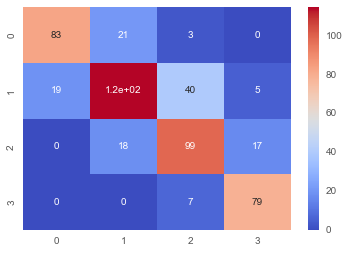

In [81]:
print("Accuracy: ", knn.score(X,y))
print("----------------------------")
print(metrics.confusion_matrix(knn.predict(X),y))
sns.heatmap(metrics.confusion_matrix(knn.predict(X),y), cmap = "coolwarm", annot = True)

In [78]:
basicKNN = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = "uniform")
basicKNN.fit(X,y)

print("Accuracy: ", basicKNN.score(X,y))
print("---------------------------")
metrics.confusion_matrix(basicKNN.predict(X),y)

Accuracy:  0.786561264822
---------------------------


array([[ 87,  20,   2,   0],
       [ 15, 113,  28,   6],
       [  0,  21, 112,   9],
       [  0,   0,   7,  86]])

Answer: TODO

## Question 4. 
+ Is this error reliable? 
+ What could we do to make it better?

Answer: distance weight helps, or updated the k value

## Question 5.  
+ Now use 10-fold cross-validation to choose the most efficient `k`

In [75]:
k = np.arange(5,101,1)
kf = cross_validation.KFold(len(X), n_folds=10)
gs5 = grid_search.GridSearchCV(estimator = neighbors.KNeighborsClassifier(),
                               param_grid = {"n_neighbors": k},
                               cv = 10)
gs5.fit(X, y)
knn5 = gs5.best_estimator_
print(knn5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='uniform')


In [90]:
gs5.best_params_

{'n_neighbors': 44}

## Question 6.  

+ Explain your findings
+ What were your best parameters?
+ What was the best k?
+ What was the best model?

Answer: The original basic one was the best estimator which is confusing to me, the best k is still 5 but how did the grid search not find that?

## Question 7.  

+ Train your model with the optimal `k` you found above 
+ (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [83]:
print("Accuracy: ", knn5.score(X,y))
print("-----------------------")
print(metrics.confusion_matrix(knn5.predict(X),y))

Accuracy:  0.715415019763
-----------------------
[[ 83  23   3   0]
 [ 17 104  41   4]
 [  2  27 101  23]
 [  0   0   4  74]]


Answer: TODO

## Question 8.  

+ After training your model with that `k`, 
+ use it to *predict* the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`
+ If you are confused, check out the sklearn documentation for KNN

In [89]:
pd.DataFrame(data = [2, 19, 3.5], index = ["RM", "PTRATIO", "LSTAT"]).T

,RM,PTRATIO,LSTAT
0,2.0,19.0,3.5


In [88]:
knn5.predict(pd.DataFrame(data = [2, 19, 3.5], index = ["RM", "PTRATIO", "LSTAT"]).T)

array(['Level 2'], dtype=object)

Answer: Level 2